## SPOTIFY PROJECT

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('SpotifyFeatures.csv')

In [3]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [5]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [7]:
df.isnull().count()

genre               232725
artist_name         232725
track_name          232725
track_id            232725
popularity          232725
acousticness        232725
danceability        232725
duration_ms         232725
energy              232725
instrumentalness    232725
key                 232725
liveness            232725
loudness            232725
mode                232725
speechiness         232725
tempo               232725
time_signature      232725
valence             232725
dtype: int64

In [9]:
df = df.drop(columns=[
    'track_id', 'track_name', 'artist_name',
    'key', 'mode', 'time_signature', 'genre'
])
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814
1,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816
2,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368
3,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227
4,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        232725 non-null  int64  
 1   acousticness      232725 non-null  float64
 2   danceability      232725 non-null  float64
 3   duration_ms       232725 non-null  int64  
 4   energy            232725 non-null  float64
 5   instrumentalness  232725 non-null  float64
 6   liveness          232725 non-null  float64
 7   loudness          232725 non-null  float64
 8   speechiness       232725 non-null  float64
 9   tempo             232725 non-null  float64
 10  valence           232725 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 19.5 MB


In [11]:
df.isnull().sum()

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
dtype: int64

In [13]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop(['popularity'], axis=1))  # exclude target for now

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

df['Cluster'] = clusters
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Cluster
0,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814,0
1,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816,0
2,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368,3
3,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227,3
4,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390,3


In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)   # this shows that i want reduce my data i nthe 2 columns 

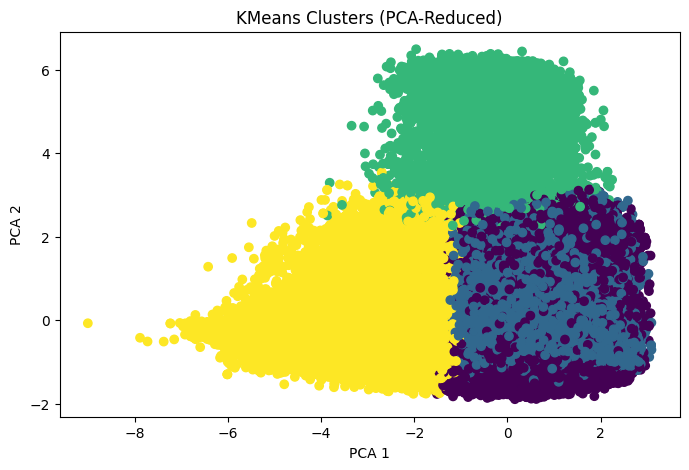

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.title('KMeans Clusters (PCA-Reduced)')    # 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## now predict the popularity 


In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(['popularity', 'Cluster'], axis=1)
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [25]:
model = RandomForestRegressor()

In [26]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
y_pred = model.predict(X_test)

In [30]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 11.843626426412511


In [31]:
df.groupby("Cluster").mean()


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
Cluster,,,,,,,,,,,
0,44.819876,0.125388,0.505942,244027.576247,0.748593,0.084991,0.241194,-6.128600,0.090010,141.195972,0.436783
1,45.680363,0.278024,0.690710,220860.878886,0.610179,0.055775,0.167104,-7.761175,0.101433,107.818797,0.598342
2,21.303762,0.788392,0.562280,243757.412702,0.661288,0.001255,0.728468,-11.998209,0.872454,98.095499,0.414877
3,30.446867,0.835554,0.352205,248407.529453,0.201016,0.462397,0.164036,-17.975794,0.049615,105.562941,0.202139


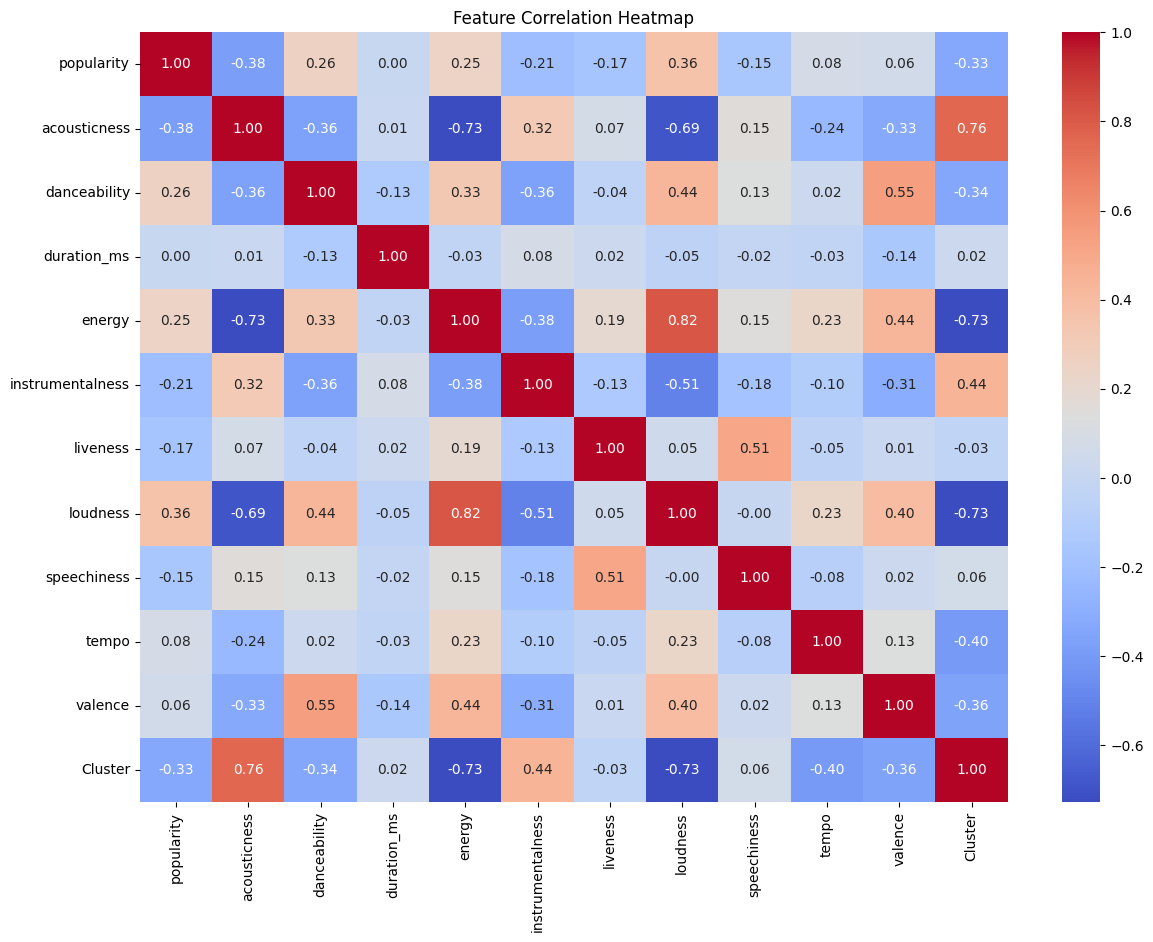

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")   # annot : for number to shoe in the heat map , cmap : for colour cool colour  , fmt: foramte the decimal plces to 2
plt.title("Feature Correlation Heatmap")
plt.show()


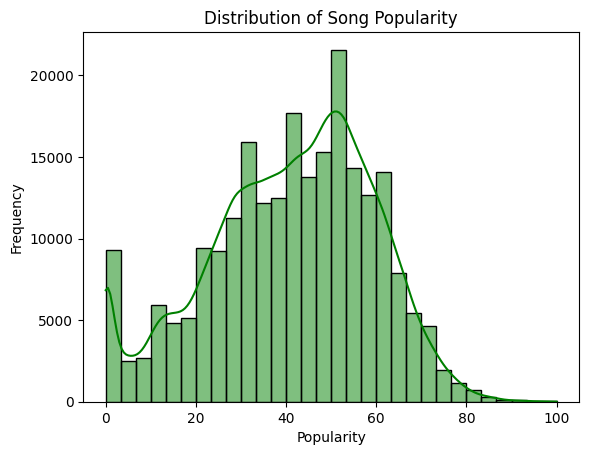

In [34]:
sns.histplot(df['popularity'], bins=30, kde=True, color='green')
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


C:\Users\gadhv\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


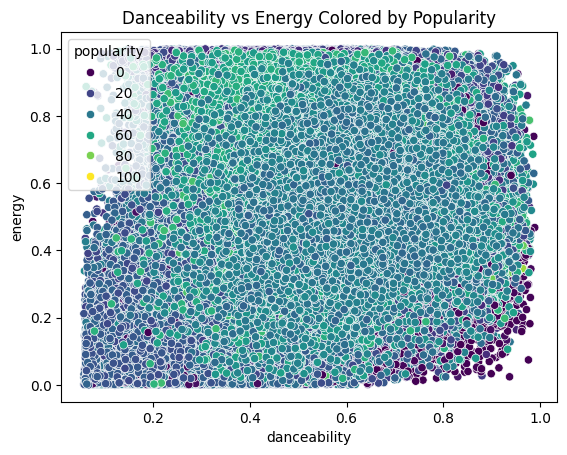

In [35]:
sns.scatterplot(x='danceability', y='energy', hue='popularity', data=df, palette='viridis')
plt.title("Danceability vs Energy Colored by Popularity")
plt.show()


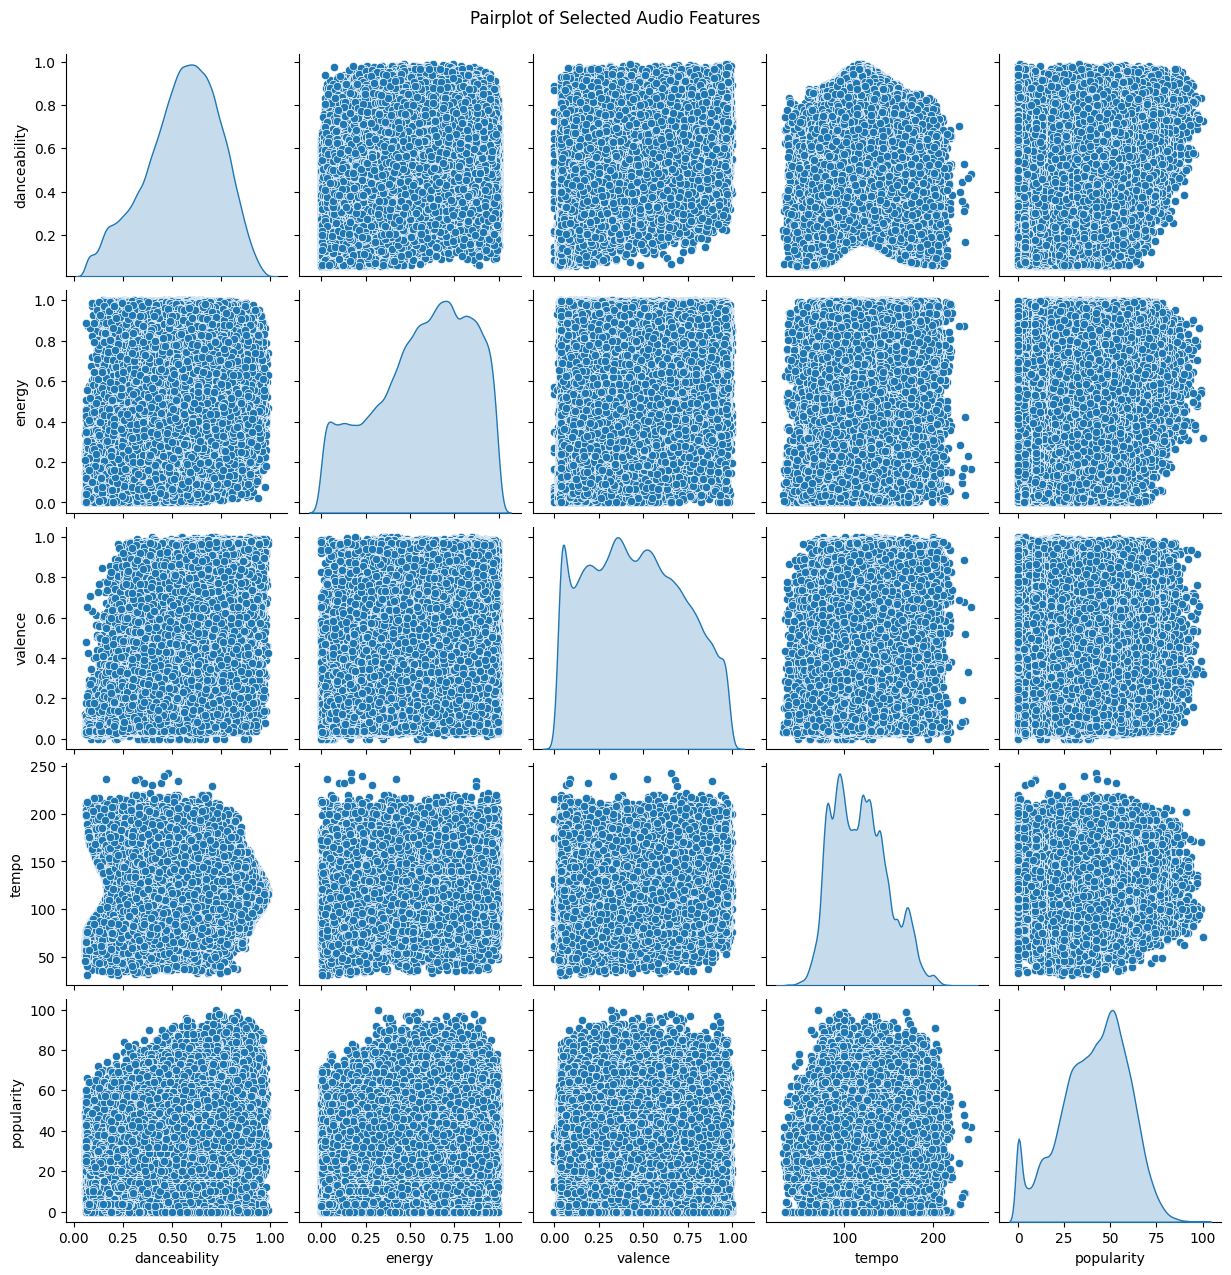

In [36]:
selected = ['danceability', 'energy', 'valence', 'tempo', 'popularity']
sns.pairplot(df[selected], diag_kind='kde')
plt.suptitle("Pairplot of Selected Audio Features", y=1.02)
plt.show()
